<a href="https://colab.research.google.com/github/UTEDungNguyen/AI-Homework04/blob/main/Automobile_Cruise_Control.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 19.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=881629faf601f6d689bb7a47ec3a54cc8bb7a326538a6fcfd26cb966140fcff2
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
from matplotlib.legend import time
import matplotlib
from skfuzzy.control.controlsystem import ControlSystemSimulation
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
universe = np.linspace(-20,20,5) 
universe1 = np.linspace(-5,5,5)
universe2 = np.linspace(0,1000,200)
vel = ctrl.Antecedent(universe, 'vel')
acc = ctrl.Antecedent(universe1, 'acc')
engine = ctrl.Consequent(universe2, 'engine')

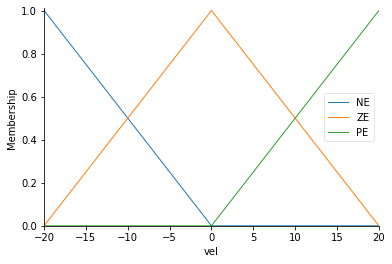

In [4]:
vel['NE'] = fuzzy.trimf(vel.universe,[-20,-20,0])
vel['ZE'] = fuzzy.trimf(vel.universe,[-20,0,20])
vel['PE'] = fuzzy.trimf(vel.universe,[0,20,20])
vel.view()

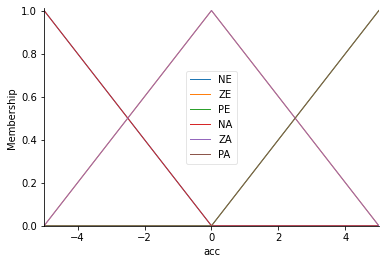

In [8]:
acc['NA'] = fuzzy.trimf(acc.universe,[-5,-5,0])
acc['ZA'] = fuzzy.trimf(acc.universe,[-5,0,5])
acc['PA'] = fuzzy.trimf(acc.universe,[0,5,5])
acc.view()

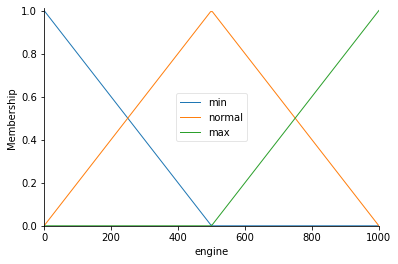

In [9]:
engine['min'] = fuzzy.trimf(engine.universe,[0,0,500])
engine['normal'] = fuzzy.trimf(engine.universe,[0,500,1000])
engine['max'] = fuzzy.trimf(engine.universe,[500,1000,1000])
engine.view()

In [10]:
rule = []

rule.append(ctrl.Rule(antecedent=((vel['NE']&acc['NA'])|(vel['NE']&acc['ZA'])|(vel['NE']&acc['PA'])), consequent= engine['min']))                        
rule.append(ctrl.Rule(antecedent=((vel['ZE']&acc['NA'])|(vel['ZE']&acc['ZA'])|(vel['ZE']&acc['PA'])), consequent= engine['normal']))                                                                                        
rule.append(ctrl.Rule(antecedent=((vel['PE']&acc['NA'])|(vel['PE']&acc['ZA'])|(vel['PE']&acc['PA'])), consequent= engine['max']))

<ipython-input-22-3090104915d1>:19: UserWarning: The following kwargs were not used by contour: 'anpha'
  view_z = ax.contourf(x,y,z, zdir= 'z', offset= 25, cmap= 'viridis', anpha= 0.5)
<ipython-input-22-3090104915d1>:20: UserWarning: The following kwargs were not used by contour: 'anpha'
  view_x = ax.contourf(x,y,z, zdir= 'x', offset= -20, cmap= 'viridis', anpha= 0.5)
<ipython-input-22-3090104915d1>:21: UserWarning: The following kwargs were not used by contour: 'anpha'
  view_y = ax.contourf(x,y,z, zdir= 'y', offset= -8, cmap= 'viridis', anpha= 0.5)


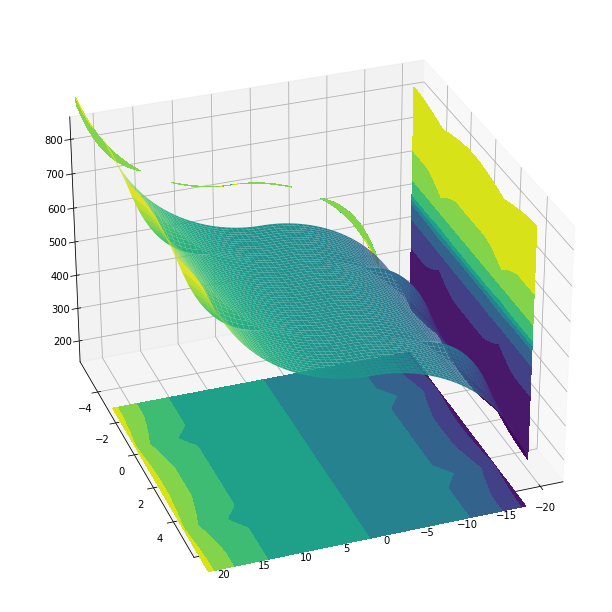

In [22]:
System  = ctrl.ControlSystem(rule)
sim = ctrl.ControlSystemSimulation(System, flush_after_run= 61*61+1)
upSampled1 = np.linspace(-20,20,61)
upSampled2 = np.linspace(-5,5,61)
x,y = np.meshgrid(upSampled1, upSampled2)
z = np.zeros_like(x)

for i in range(61):
  for j in range(61):
    sim.input['vel']= x[i,j]
    sim.input['acc']=y[i,j]
    sim.compute()
    z[i,j]=sim.output['engine']

fig = plt.figure(figsize =(11,11))
ax = fig.add_subplot(111,projection = '3d')
suf = ax.plot_surface(x,y,z, rstride= 1, cstride= 1, cmap = 'viridis',linewidth= 0.4, antialiased= True)
                      
view_z = ax.contourf(x,y,z, zdir= 'z', offset= 25, cmap= 'viridis', anpha= 0.5)
view_x = ax.contourf(x,y,z, zdir= 'x', offset= -20, cmap= 'viridis', anpha= 0.5)
view_y = ax.contourf(x,y,z, zdir= 'y', offset= -8, cmap= 'viridis', anpha= 0.5)
ax.view_init(30,70)